# Hierarchical bootsrap

### Set path

In [1]:
PROJECT_PATH = 'C:/Users/micha/projects/oscillation_vs_exponent/'

## Set-up

### Imports

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time

### Settings

In [3]:
N_ITERATIONS = 1000 # number of iterations for bootstrapping
VAR = 'exponent' # variable to analyze

## Main

### load specparam results

In [4]:
# load spectral parameterization results
results = pd.read_csv(f"{PROJECT_PATH}/data/results/spectral_parameters.csv", index_col=0)

# show
print(results.shape)
print(len(results)/8)
results.head()

(5560, 19)
695.0


,patient,chan_idx,label,pos_y,pos_x,pos_z,unique_id,material,memory,epoch,offset,knee,exponent,f_rotation,alpha_cf,alpha_pw,alpha_bw,alpha_bp,alpha_adj
0,pat02,0,A01-A02,-65.43100,61.94490,3.55955,pat02_0,words,hit,prestim,8.451107,12.903272,3.542673,10.978558,NaN,NaN,NaN,27777.899824,5664.172994
1,pat02,1,A02-A03,-70.93895,57.17765,12.15540,pat02_1,words,hit,prestim,7.595982,12.332651,3.052480,83.836257,10.839096,0.210785,2.000000,14445.161672,2948.320508
2,pat02,2,A03-A04,-75.39550,51.39440,20.94335,pat02_2,words,hit,prestim,7.056773,8.787521,2.774045,89.824561,12.850783,0.276397,2.000000,15085.969728,4269.780182
3,pat02,3,A04-A05,-78.91950,43.90980,30.13485,pat02_3,words,hit,prestim,7.595080,10.177476,2.940543,59.883041,NaN,NaN,NaN,23672.502537,2726.078761
4,pat02,4,A05-A06,-80.96735,35.21485,38.13475,pat02_4,words,hit,prestim,7.399935,9.126477,2.872949,65.871345,11.565201,0.227912,2.671217,21742.063343,3556.630628


### perform hierarchical bootsrap
level 1: epoch (experimental condition)  
level 2: patient  
level 3: channel

In [5]:
# split results by trial type (words/faces) and take successful trials only (memory==hit)
df_w = results.loc[((results['memory']=='hit')&(results['material']=='words'))]
df_f = results.loc[((results['memory']=='hit')&(results['material']=='faces'))]

# start with one trial type
df = df_w.copy()


In [6]:
# count number of channels for each patient
patients = results['patient'].unique()
temp = results[(results['memory']=='hit') & (results['material']=='words') & (results['epoch']=='prestim')]
n_channels = dict()
for patient in patients:
    n_channels[patient] = len(temp.loc[temp['patient']==patient])
n_channels

{'pat02': 9,
 'pat04': 82,
 'pat05': 64,
 'pat08': 76,
 'pat10': 21,
 'pat11': 68,
 'pat15': 55,
 'pat16': 13,
 'pat17': 56,
 'pat19': 88,
 'pat20': 37,
 'pat21': 73,
 'pat22': 53}

In [ ]:
# perform hierarchical bootstrap on exponent values

# time it 
t_start = time()

# successful trials only
df = results[results['memory']=='hit']
n_samples = len(df)

# get levels
epochs = df['epoch'].unique()
materials = df['material'].unique()
# patients = df['patient'].unique()

# loop through iterations
diff = np.zeros(N_ITERATIONS)
for i_iteration in range(N_ITERATIONS):
    # display progress
    print(f"Iteration {i_iteration+1}/{N_ITERATIONS}")

    # resample level 1: epoch
    epochs = np.random.choice(epochs, size=n_samples)
    # resample level 2: patient
    patients = np.random.choice(patients, size=n_samples)

    # resample level 3: channel, and get data
    value = np.zeros(n_samples)
    for i_sample, (epoch, patient) in enumerate(zip(epochs, patients)):
        # resample level 4: channel
        channel = np.random.choice(n_channels[patient], size=1)[0]

        # get data
        value[i_sample] = df.loc[(df['epoch']==epoch) & (df['patient']==patient) & (df['chan_idx']==channel), VAR].values[0]

    # compute difference between resampled experimental conditions
    diff[i_iteration] = np.nanmean(value[len(value)//2:]) - np.nanmean(value[:len(value)//2])
    # print(diff[i_iteration])

# compute true difference between experimental conditions 
true_diff = np.nanmean(df.loc[df['epoch']=='poststim', VAR]) - \
    np.nanmean(df.loc[df['epoch']=='prestim', VAR])
print(f"True difference: {true_diff :0.3f}")

# plot
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(diff, bins=20, color='k')
ax.axvline(true_diff, color='k', linestyle='--')
ax.set_xlabel('exponent difference')
ax.set_ylabel('count')
ax.set_title('Resampled exponent')
plt.show()

# print time
print(f"Resampling completed in {time() - t_start :0.1f} s")

In [ ]:
diff_w = diff.copy()
true_diff_w = true_diff.copy()

In [ ]:
# perform hierarchical bootstrap on exponent values

# now the other trial type
df = df_f.copy()

# time it 
t_start = time()

# successful trials only
df = results[results['memory']=='hit']
n_samples = len(df)

# get levels
epochs = df['epoch'].unique()
materials = df['material'].unique()
# patients = df['patient'].unique()

# loop through iterations
diff = np.zeros(N_ITERATIONS)
for i_iteration in range(N_ITERATIONS):
    # display progress
    print(f"Iteration {i_iteration+1}/{N_ITERATIONS}")

    # resample level 1: epoch
    epochs = np.random.choice(epochs, size=n_samples)
    # resample level 2: patient
    patients = np.random.choice(patients, size=n_samples)

    # resample level 3: channel, and get data
    value = np.zeros(n_samples)
    for i_sample, (epoch, patient) in enumerate(zip(epochs, patients)):
        # resample level 4: channel
        channel = np.random.choice(n_channels[patient], size=1)[0]

        # get data
        value[i_sample] = df.loc[(df['epoch']==epoch) & (df['patient']==patient) & (df['chan_idx']==channel), VAR].values[0]

    # compute difference between resampled experimental conditions
    diff[i_iteration] = np.nanmean(value[len(value)//2:]) - np.nanmean(value[:len(value)//2])
    # print(diff[i_iteration])

# compute true difference between experimental conditions 
true_diff = np.nanmean(df.loc[df['epoch']=='poststim', VAR]) - \
    np.nanmean(df.loc[df['epoch']=='prestim', VAR])
print(f"True difference: {true_diff :0.3f}")

# plot
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(diff, bins=20, color='k')
ax.axvline(true_diff, color='k', linestyle='--')
ax.set_xlabel('\u0394 exponent')
ax.set_ylabel('count')
plt.show()

# print time
print(f"Resampling completed in {time() - t_start :0.1f} s")

In [ ]:
diff_f = diff.copy()
true_diff_f = true_diff.copy()

### save/load results

In [4]:
# save results
# np.savez(f"{PROJECT_PATH}/data/results/hierarchical_bootstrap", diff_f=diff_f, diff_w=diff_w, true_diff_f=true_diff_f, true_diff_w=true_diff_w)

# load results
fname_in = f"{PROJECT_PATH}/data/results/hierarchical_bootstrap.npz"
data_in = np.load(fname_in)
diff_f = data_in['diff_f']
diff_w = data_in['diff_w']
true_diff_f = data_in['true_diff_f']
true_diff_w = data_in['true_diff_w']


### plot results

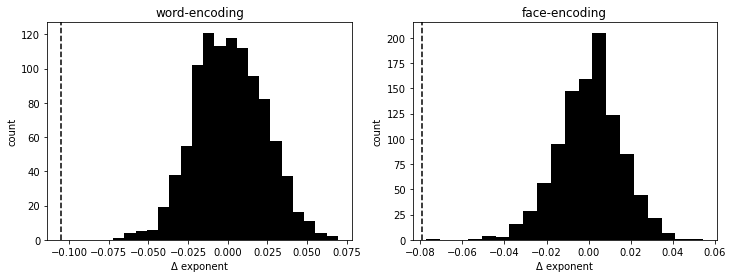

word-encoding: -0.10503906089771942
face-encoding: -0.07911433805996237


In [5]:
# plot results for both trial types

# plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))

ax1.hist(diff_w, bins=20, color='k')
ax1.axvline(true_diff_w, color='k', linestyle='--')
ax1.set_title('word-encoding')

ax2.hist(diff_f, bins=20, color='k')
ax2.axvline(true_diff_f, color='k', linestyle='--')
ax2.set_title('face-encoding')

for ax in [ax1, ax2]:
    ax.set_xlabel('\u0394 exponent')
    ax.set_ylabel('count')
plt.show()

print(f"word-encoding: {true_diff_w}")
print(f"face-encoding: {true_diff_f}")


### include material as additional level

In [ ]:
# # perform hierarchical bootstrap - include material as additional level

# # time it 
# t_start = time()

# # successful trials only
# df = results[results['memory']=='hit']
# n_samples = len(df)

# # get levels
# epochs = df['epoch'].unique()
# materials = df['material'].unique()

# # loop through iterations
# diff = np.zeros(n_iterations)
# for ii in range(n_iterations):
#     # display progress
#     print(f"Iteration {ii+1}/{n_iterations}")

#     # resample level 1: epoch
#     epochs = np.random.choice(epochs, size=n_samples)
#     # resample level 2: material
#     materials = np.random.choice(materials, size=n_samples)
#     # resample level 3: patient
#     patients = np.random.choice(patients, size=n_samples)

#     # resample level 4: channel, and get data
#     value = np.zeros(n_samples)
#     for i_sample, (epoch, material, patient) in enumerate(zip(epochs, materials, patients)):
#         # resample level 4: channel
#         channel = np.random.choice(n_channels[patient], size=1)[0]

#         # get data
#         value[i_sample] = df.loc[(df['epoch']==epoch) & (df['material']==material) \
#             & (df['patient']==patient) & (df['chan_idx']==channel), var].values[0]

#     # compute difference between resampled experimental conditions
#     diff[i_iteration] = np.nanmean(value[len(value)//2:]) - np.nanmean(value[:len(value)//2])
#     print(diff[i_iteration])

# # plot
# fig, ax = plt.subplots(figsize=(6,4))
# ax.hist(diff, bins=20, color='k')
# ax.axvline(true_diff, color='k', linestyle='--')
# ax.set_xlabel('exponent difference')
# ax.set_ylabel('count')
# ax.set_title('Resampled exponent')
# plt.show()

# # print time
# print(f"Resampling completed in {time() - t_start :0.1f} s")

### develop generalized hierarchical bootstrap function

In [6]:
# hierarchical bootstrap function

def hierarchical_bootstrap(df, variable, condition, level_2, level_3, iterations, verbose=True):
    """
    Perform hierarchical bootstrap on data. This function assumes that each cluster is 
    represented in each experimental condition.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Dataframe containing data to resample.
    variable : str
        Variable to resample.
    condition : str
        Experimental condition of interest (level 1 of hierarchy).
    level_2 : str
        Level 2 of hierarchy.
    level_3 : str
        Level 3 of hierarchy.
    iterations : int
        Number of iterations for resampling.
    verbose : bool
        If True, print results.

    Returns
    -------
    distribution : numpy.ndarray
        Resampled distribution of differences between experimental conditions.
    true_diff : float
        True difference between experimental conditions.

    """
    # check that there are only two experimental conditions
    conditions = df[condition].unique()
    if len(conditions) != 2:
        raise ValueError("More than two experimental conditions detected.")

    # check that each cluster is represented in each experimental condition
    clusters = df.loc[df[condition]==conditions[0], level_2].unique()
    clusters_1 = df.loc[df[condition]==conditions[1], level_2].unique()
    if not np.array_equal(clusters, clusters_1):
        raise ValueError("Each cluster must be represented in each experimental condition.")
    n_clusters = len(clusters) * 2 # number of clusters across both experimental conditions
    
    # compute true difference between experimental conditions 
    true_diff = np.nanmean(df.loc[df[condition]==conditions[1], variable]) - \
        np.nanmean(df.loc[df[condition]==conditions[0], variable])

    # loop through iterations
    distribution = np.zeros(iterations)
    for i_iteration in range(iterations):
        # display progress
        print(f"Iteration {i_iteration+1}/{iterations}")

        # Resample level 2 
        # Because each cluster is represented in both experimental conditions,
        # we must resample cluster-condition pairs for each surrogate group.
        clusters_resampled = np.vstack([np.random.choice([0, 1], size=len(clusters)*2), \
            np.random.choice(clusters, size=len(clusters)*2)]).T

        # resample level 3
        values = np.zeros(n_clusters)
        for i_cluster, cluster_i in enumerate(clusters_resampled):
            # resample level 3
            instances = instances = df.loc[(df[condition]==conditions[cluster_i[0]]) & (df[level_2]==cluster_i[1]), level_3].unique()
            instances_resampled = np.random.choice(instances, size=len(instances))

            # get data
            values_cluster = np.zeros(len(instances))
            for i_instance, instance_i in enumerate(instances_resampled):
                values_cluster[i_instance] = df.loc[(df[condition]==conditions[cluster_i[0]]) & (df[level_2]==cluster_i[1]) \
                    & (df[level_3]==instance_i), variable].values[0]
            values[i_cluster] = np.nanmean(values_cluster)

        # compute difference between surrogate groups
        distribution[i_iteration] = np.nanmean(values[len(values)//2:]) - np.nanmean(values[:len(values)//2])

    # compute p-value (proportion of surrogate differences greater than true difference)
    p_value = np.sum(np.abs(distribution) > np.abs(true_diff)) / len(distribution)

    # print results
    if verbose:
        print(f"True difference: {true_diff :0.3f}")
        print(f"p-value: {p_value :0.3f}")

    return p_value, distribution, true_diff

def plot_permutation_results(distribution, true_diff):
    fig, ax = plt.subplots(figsize=(6,4))
    ax.hist(distribution, bins=20, color='k', label='resampled difference')
    ax.axvline(true_diff, color='k', linestyle='--', label='true difference')
    ax.set_xlabel('difference')
    ax.set_ylabel('count')
    ax.set_title('Permutation test results')
    ax.legend()
    plt.show()


Iteration 1/1000
Iteration 2/1000
Iteration 3/1000
Iteration 4/1000
Iteration 5/1000
Iteration 6/1000
Iteration 7/1000
Iteration 8/1000
Iteration 9/1000
Iteration 10/1000
Iteration 11/1000
Iteration 12/1000
Iteration 13/1000
Iteration 14/1000
Iteration 15/1000
Iteration 16/1000
Iteration 17/1000
Iteration 18/1000
Iteration 19/1000
Iteration 20/1000
Iteration 21/1000
Iteration 22/1000
Iteration 23/1000
Iteration 24/1000
Iteration 25/1000
Iteration 26/1000
Iteration 27/1000
Iteration 28/1000
Iteration 29/1000
Iteration 30/1000
Iteration 31/1000
Iteration 32/1000
Iteration 33/1000
Iteration 34/1000
Iteration 35/1000
Iteration 36/1000
Iteration 37/1000
Iteration 38/1000
Iteration 39/1000
Iteration 40/1000
Iteration 41/1000
Iteration 42/1000
Iteration 43/1000
Iteration 44/1000
Iteration 45/1000
Iteration 46/1000
Iteration 47/1000
Iteration 48/1000
Iteration 49/1000
Iteration 50/1000
Iteration 51/1000
Iteration 52/1000
Iteration 53/1000
Iteration 54/1000
Iteration 55/1000
Iteration 56/1000
I

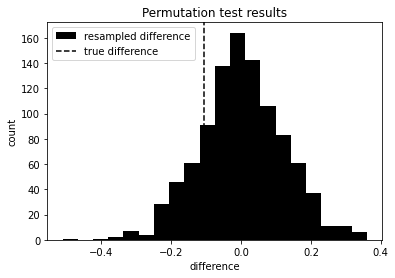

In [8]:
# apply hierarchical bootstrap to exponent values
p_value, distribution, true_diff = hierarchical_bootstrap(df, 'exponent', 'epoch', 'patient', 'chan_idx', 1000)
plot_permutation_results(distribution, true_diff)